# 离散傅里叶变换

   离散傅里叶变换（即 DFT）是数字信号处理的首要工具。该产品的基础是快速傅里叶变换 (FFT)，这是一种可减少执行时间的 DFT 计算方法。许多工具箱函数（包括 Z 域频率响应、频谱和倒频谱分析，以及一些滤波器设计和实现函数）都支持 FFT。
   MATLAB® 环境提供 fft 和 ifft 函数，分别用于计算离散傅里叶变换及其逆变换。对于输入序列 x 及其变换版本 X（围绕单位圆的等间隔频率的离散时间傅里叶变换），这两个函数实现以下关系
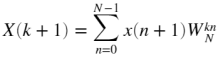
   和
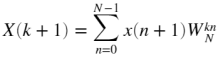
在这些方程中，序列下标从 1 而不是 0 开始，因为采用 MATLAB 向量索引方案，并且
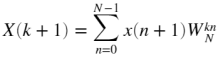
注意  MATLAB 约定是对 fft 函数使用负 j。这是工程约定；物理和纯数学通常使用正 j。
使用单个输入参数 x 的 fft 计算输入向量或矩阵的 DFT。如果 x 是向量，fft 计算向量的 DFT；如果 x 是矩形数组，fft 计算每个数组列的 DFT。
例如，创建时间向量和信号：

要以度为单位绘制幅值和相位，请键入以下命令：

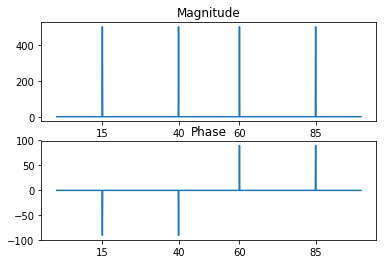

In [2]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from scipy.fftpack import fft

t=np.arange(0,10,1/100)
x=np.array([np.sin(2*pi*15*t) +np.sin(2*pi*40*t)])
y=fft(x)
y=y.reshape(len(t))
m=abs(y)
y[m<1e-6]=0
p=np.unwrap(np.angle(y))

f=np.arange(0,len(t),1)*100/len(t)
plt.subplot(211)
plt.plot(f,m)
plt.title('Magnitude')
plt.xticks([15,40,60,85])
plt.subplot(212)
plt.plot(f,p*180/pi)
plt.title('Phase')
plt.xticks([15,40,60,85])
plt.show()

fft的第二个参数指定变换的点数 n，表示 DFT 的长度：
Matlab实现：

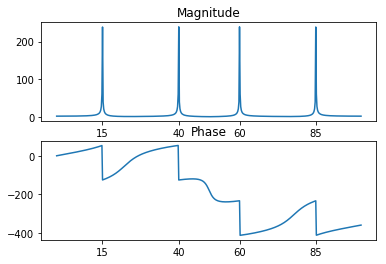

In [3]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from scipy.fftpack import fft

t=np.arange(0,10,1/100)
x=np.array([np.sin(2*pi*15*t) +np.sin(2*pi*40*t)])
n=512
y=fft(x,n)
y=y.reshape(n)
m=abs(y)
p=np.unwrap(np.angle(y))
f=np.arange(0,n,1)*100/n

plt.subplot(211)
plt.plot(f,m)
plt.title('Magnitude')
plt.xticks([15,40,60,85])

plt.subplot(212)
plt.plot(f,p*180/pi)
plt.title('Phase')
plt.xticks([15,40,60,85])
plt.show()

在本例中，如果输入序列比 n 短，fft 会用零填充输入序列，如果输入序列比 n 长，则会截断序列。如果未指定 n，则默认为输入序列的长度。fft 的执行时间取决于其执行的 DFT 的长度 n；有关该算法的详细信息，请参阅 fft 参考页。
注意：得到的 FFT 幅值是 A*n/2，其中 A 是原始幅值，n 是 FFT 点数。仅当 FFT 点的数量大于或等于数据样本的数量时，上述情形才成立。如果 FFT 点数小于数据样本数，则 FFT 幅值比原始幅值低上述量。
离散傅里叶逆变换函数 ifft 也接受输入序列以及可选的变换所需点数。尝试以下示例；原始序列 x 和重新构造的序列是相同的（在舍入误差内）。
Matlab 实现：

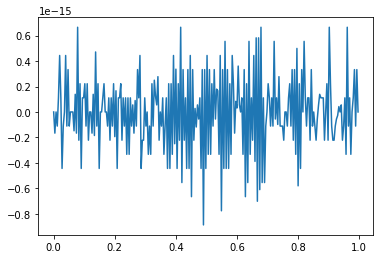

In [5]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from scipy.fftpack import fft, ifft
t=np.arange(0,1,1/255)
x=np.array([np.sin(2*pi*120*t)])
y=np.real(ifft(fft(x)))
x=x.reshape(len(t))
y=y.reshape(len(t))
plt.plot(t,x-y)
plt.show()